In [1]:
cd ..

/home/dmitriishubin/Desktop/Thesis/HepaticVessel_experiment


In [2]:
import pandas as pd
import numpy as np
import pydicom as dicom
import nibabel as nib
import os
from sklearn.model_selection import KFold
import json
import matplotlib.pyplot as plt
import cv2

/home/dmitriishubin/anaconda3/envs/thesis/lib/python3.7/site-packages/dicom/__init__.py:53: UserWarning: 
This code is using an older version of pydicom, which is no longer 
maintained as of Jan 2017.  You can access the new pydicom features and API 
by installing `pydicom` from PyPI.
See 'Transitioning to pydicom 1.x' section at pydicom.readthedocs.org 
for more information.

  warnings.warn(msg)


In [3]:
DATA_PATH = '../data/Task05_Prostate/'

In [11]:
img = nib.load(f'../data/Task05_Prostate/imagesTr/prostate_39.nii.gz')
img = np.array(img.dataobj)

In [12]:
img.shape

(320, 320, 15, 2)

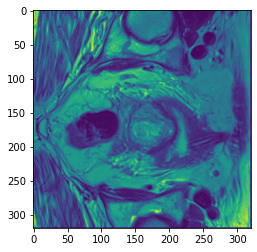

In [13]:
plt.imshow(img[:,:,10,0])

In [46]:
patients = [i for i in os.listdir(f'{DATA_PATH}imagesTr/') if i.find('._pro')==-1]

In [47]:
patients

['prostate_46.nii.gz',
 'prostate_01.nii.gz',
 'prostate_13.nii.gz',
 'prostate_42.nii.gz',
 'prostate_39.nii.gz',
 'prostate_16.nii.gz',
 'prostate_32.nii.gz',
 'prostate_40.nii.gz',
 'prostate_25.nii.gz',
 'prostate_44.nii.gz',
 'prostate_02.nii.gz',
 'prostate_17.nii.gz',
 'prostate_28.nii.gz',
 'prostate_34.nii.gz',
 'prostate_04.nii.gz',
 'prostate_31.nii.gz',
 'prostate_21.nii.gz',
 'prostate_43.nii.gz',
 'prostate_29.nii.gz',
 'prostate_38.nii.gz',
 'prostate_37.nii.gz',
 'prostate_00.nii.gz',
 'prostate_07.nii.gz',
 'prostate_35.nii.gz',
 'prostate_41.nii.gz',
 'prostate_24.nii.gz',
 'prostate_10.nii.gz',
 'prostate_20.nii.gz',
 'prostate_47.nii.gz',
 'prostate_06.nii.gz',
 'prostate_14.nii.gz',
 'prostate_18.nii.gz']

In [50]:
names = []

os.makedirs(f'{DATA_PATH}processed_data',exist_ok=True)

count = 0

for patient in patients:
    img = nib.load(f'{DATA_PATH}imagesTr/{patient}')
    img = np.array(img.dataobj)[:,:,:,0]
    seg = nib.load(f'{DATA_PATH}labelsTr/{patient}')
    seg = np.array(seg.dataobj)
    
    patient = patient[:-7]
    
    os.makedirs(f'{DATA_PATH}processed_data/{patient}',exist_ok=True)
    
    for i in range(img.shape[-1]):
        temp_img = img[:,:,i]
        temp_seg = seg[:,:,i]
        
        temp_img = temp_img.reshape(temp_img.shape[0], temp_img.shape[1],1)
        temp_seg = temp_seg.reshape(temp_seg.shape[0], temp_seg.shape[1],1)
        
        temp_img = cv2.resize(temp_img,(320,320)).reshape(320,320,1)
        temp_seg = cv2.resize(temp_seg,(320,320)).reshape(320,320,1)
        
        np.save(f'{DATA_PATH}processed_data/{patient}/{i}.npy',temp_img)
        np.save(f'{DATA_PATH}processed_data/{patient}/{i}_seg.npy',temp_seg)
        count+=1
            

In [53]:
for index,patient in enumerate(patients):
    patients[index]=patient[:-7]

In [55]:
patients = np.array(patients)

kf = KFold(5,shuffle=True,random_state=42)
for fold,(train_index, test_index) in enumerate(kf.split(patients)):
    patients_train, patients_test = patients[train_index], patients[test_index]
    
    split = {
        'train': patients_train.tolist(),
        'val': patients_test.tolist(),
    }
    
    with open(f'../data/split_table/{fold}_split_table.json', 'w') as outfile:
            json.dump(split, outfile)